## Example for a Notebook 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file_csv: str = 'data/tracks_EB3_GFR_5JUL.csv'
data = pd.read_csv(file_csv, sep=',')
data = data.drop(columns=["LABEL"])
data_name = pd.Series(data.T[0].values,index=data.T.index).to_dict()
data_units = pd.Series(data.T[2].values,index=data.T.index).to_dict()
data = data.drop([0, 1, 2])
data = data.astype('float64')
time_start = data.TRACK_START
data = data.loc[(data["TRACK_START"]>0.0) &
                (data["TRACK_START"]<time_start.max()-1) &
                (data["TRACK_STOP"]<time_start.max()-1)
               ]



In [3]:
#data["TOTAL_DISTANCE_TRAVELED"]  # Länge des MT
#data["TRACK_MEAN_SPEED"]  # Mittelwert der Geschwindigkeit des MT



data.head(2)
#data
#data["TOTAL_DISTANCE_TRAVELED"]

,TRACK_INDEX,TRACK_ID,NUMBER_SPOTS,NUMBER_GAPS,NUMBER_SPLITS,NUMBER_MERGES,NUMBER_COMPLEX,LONGEST_GAP,TRACK_DURATION,TRACK_START,...,TRACK_MIN_SPEED,TRACK_MEDIAN_SPEED,TRACK_STD_SPEED,TRACK_MEAN_QUALITY,TOTAL_DISTANCE_TRAVELED,MAX_DISTANCE_TRAVELED,CONFINEMENT_RATIO,MEAN_STRAIGHT_LINE_SPEED,LINEARITY_OF_FORWARD_PROGRESSION,MEAN_DIRECTIONAL_CHANGE_RATE
3,1.0,1.0,46.0,0.0,0.0,0.0,0.0,0.0,22.5,1.5,...,0.013345,0.068380,0.058216,3.635184,1.813940,0.527888,0.144837,0.011677,0.144837,2.592712
11,47.0,47.0,26.0,1.0,0.0,0.0,0.0,1.0,13.0,1.5,...,0.037074,0.258083,0.306518,3.559510,4.479456,2.928417,0.653744,0.225263,0.708599,1.409295


In [7]:
print(data["TOTAL_DISTANCE_TRAVELED"].mean())
print(data["TRACK_MEAN_SPEED"].mean())

3.5644169367762064
0.23690055401131133


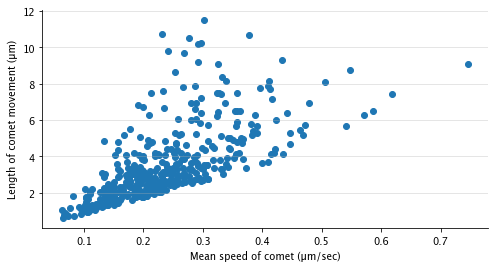

In [4]:
fig, ax = plt.subplots(figsize=(8, 4)) #, ncols=2)
# Hide the right and top spines
ax.yaxis.grid(alpha=0.4)
#plt.yscale('log')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.plot(data["TOTAL_DISTANCE_TRAVELED"],data["TRACK_MEAN_SPEED"])

ax.scatter(y=data["TOTAL_DISTANCE_TRAVELED"], x=data["TRACK_MEAN_SPEED"])#, yerr=data_wet_5A.Gbg_std, color='blue')  # the wet data 

ax.set_ylabel('Length of comet movement (µm)')
ax.set_xlabel('Mean speed of comet (µm/sec)')

#plt.legend(loc=(1.1,0.5), frameon=False)
plt.savefig('reports/distance_vs_meanspeed.png',dpi=800, bbox_inches='tight')
plt.show()

# Estimated probability density

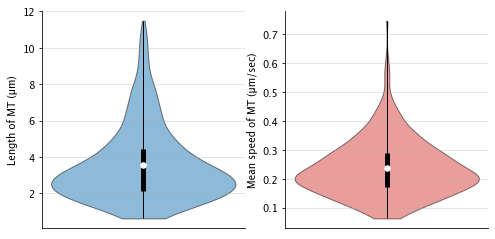

In [5]:
fig, (ax1, ax2) = plt.subplots(figsize=(8, 4), ncols=2)
ax1.yaxis.grid(alpha=0.4)
ax2.yaxis.grid(alpha=0.4)


ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xticks([])

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_xticks([])


ax1.set_ylabel('Length of MT (µm)')
ax2.set_ylabel('Mean speed of MT (µm/sec)')

parts1 = ax1.violinplot(data["TOTAL_DISTANCE_TRAVELED"], widths=2, showmeans=False, showmedians=False, showextrema=False)
parts2 = ax2.violinplot(data["TRACK_MEAN_SPEED"], widths=2, showmeans=False, showmedians=False, showextrema=False)


for pc in parts2['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(0.5)
    
for pc in parts1['bodies']:
    #pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(0.5)    


quartile11, medians1, quartile13 = np.percentile(data["TOTAL_DISTANCE_TRAVELED"], [25, 50, 75])

ax1.scatter(1, data["TOTAL_DISTANCE_TRAVELED"].mean(), marker='o', color='white', s=30, zorder=3)
ax1.vlines(1, quartile11, quartile13, color='k', linestyle='-', lw=5)
ax1.vlines(1, data["TOTAL_DISTANCE_TRAVELED"].min(), data["TOTAL_DISTANCE_TRAVELED"].max(), color='k', linestyle='-', lw=1)  # TODO

quartile1, medians, quartile3 = np.percentile(data["TRACK_MEAN_SPEED"], [25, 50, 75])

ax2.scatter(1, data["TRACK_MEAN_SPEED"].mean(), marker='o', color='white', s=30, zorder=3)
ax2.vlines(1, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax2.vlines(1, data["TRACK_MEAN_SPEED"].min(), data["TRACK_MEAN_SPEED"].max(), color='k', linestyle='-', lw=1)  # TODO
 
#plt.legend([parts1['bodies'][0],parts2['bodies'][0]], ['meassured data', 'meassured data (x10)'], loc=(1.1,0.5), frameon=False)

plt.savefig('reports/prob_density.png',dpi=800, bbox_inches='tight')


In [6]:
data.to_excel("data/cleaned_data.xlsx")
data.to_csv("data/cleaned_data.csv", sep=';', index=False)
pd.read_csv("data/cleaned_data.csv", sep=';')

,TRACK_INDEX,TRACK_ID,NUMBER_SPOTS,NUMBER_GAPS,NUMBER_SPLITS,NUMBER_MERGES,NUMBER_COMPLEX,LONGEST_GAP,TRACK_DURATION,TRACK_START,...,TRACK_MIN_SPEED,TRACK_MEDIAN_SPEED,TRACK_STD_SPEED,TRACK_MEAN_QUALITY,TOTAL_DISTANCE_TRAVELED,MAX_DISTANCE_TRAVELED,CONFINEMENT_RATIO,MEAN_STRAIGHT_LINE_SPEED,LINEARITY_OF_FORWARD_PROGRESSION,MEAN_DIRECTIONAL_CHANGE_RATE
0,1.0,1.0,46.0,0.0,0.0,0.0,0.0,0.0,22.5,1.5,...,0.013345,0.068380,0.058216,3.635184,1.813940,0.527888,0.144837,0.011677,0.144837,2.592712
1,47.0,47.0,26.0,1.0,0.0,0.0,0.0,1.0,13.0,1.5,...,0.037074,0.258083,0.306518,3.559510,4.479456,2.928417,0.653744,0.225263,0.708599,1.409295
2,53.0,53.0,24.0,0.0,0.0,0.0,0.0,0.0,11.5,0.5,...,0.034458,0.123541,0.674554,4.456812,2.971819,2.189303,0.736688,0.190374,0.736688,2.068549
3,59.0,59.0,30.0,0.0,0.0,0.0,0.0,0.0,14.5,0.5,...,0.039436,0.193160,0.641928,4.558265,4.578234,2.539739,0.207070,0.065380,0.207070,0.950472
4,64.0,64.0,45.0,1.0,0.0,0.0,0.0,1.0,22.5,0.5,...,0.015000,0.106611,0.373287,3.861488,4.104204,1.201636,0.179531,0.032748,0.192355,2.219813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,2340.0,2340.0,22.0,2.0,0.0,0.0,0.0,1.0,11.5,155.5,...,0.037747,0.116950,0.775257,2.868323,4.385222,1.872770,0.092628,0.035321,0.102027,2.462283
398,2351.0,2351.0,23.0,0.0,0.0,0.0,0.0,0.0,11.0,156.0,...,0.053439,0.215834,0.088750,4.095303,2.307242,2.275033,0.986040,0.206821,0.986040,0.418862
399,2354.0,2354.0,19.0,0.0,0.0,0.0,0.0,0.0,9.0,156.0,...,0.089352,0.276875,0.625421,2.984303,3.683111,2.229755,0.605400,0.247751,0.605400,0.698788
400,2359.0,2359.0,20.0,1.0,0.0,0.0,0.0,1.0,10.0,156.5,...,0.016397,0.106724,0.078744,2.638300,1.211331,0.887002,0.732254,0.088700,0.727699,2.031551
